In [72]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [73]:
# Import data
data = pd.read_excel('Base Model_2019_ML_Ashiqur.xlsx', sheet_name='Base Model')

print(data.head())

   Bridge_Number  Steel_Element         CS1  CS2       CS3  CS4  temp_dp_2m  \
0          10029             28  100.000000  0.0  0.000000  0.0     19.6859   
1          10029             29   92.592593  0.0  7.407407  0.0     19.6859   
2          10029            107   99.725746  0.0  0.274254  0.0     19.6859   
3          10029            113   97.397066  0.0  2.602934  0.0     19.6859   
4          10029            152   98.630137  0.0  1.369863  0.0     19.6859   

   avg_rh_2m  temp_a_10m  temp_a_2m    ...      DECK_STRUCTURE_TYPE_107  \
0  82.387398      22.962    23.2285    ...                            1   
1  82.387398      22.962    23.2285    ...                            1   
2  82.387398      22.962    23.2285    ...                            1   
3  82.387398      22.962    23.2285    ...                            1   
4  82.387398      22.962    23.2285    ...                            1   

   SURFACE_TYPE_108A  MEMBRANE_TYPE_108B  DECK_PROTECTION_108C  \
0       

In [79]:
data = data[data['Steel_Element'] == 107] 
data = data.reset_index(drop=True) 
env_nbe_nbi_df = data[[
     'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 
#     'MAINTENANCE_021', 
    'Bridge_Age', 'ADT_029',
#        'DEGREES_SKEW_034', 
#     'SERVICE_ON_042A', 
#     'SERVICE_UND_042B',
#        'STRUCTURE_KIND_043A', 
#     'STRUCTURE_TYPE_043B', 
#     'APPR_KIND_044A',
#        'APPR_TYPE_044B', 
#     'DECK_COND_058', 
#     'SUPERSTRUCTURE_COND_059',
#        'SUBSTRUCTURE_COND_060', 
    'OPERATING_RATING_064', 'INVENTORY_RATING_066',
#        'STRUCTURAL_EVAL_067', 
#     'APPR_ROAD_EVAL_072', 
#     'DECK_STRUCTURE_TYPE_107',
#        'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
#        'PERCENT_ADT_TRUCK_109',
    'BRIDGE_CONDITION','Label_CS1','Label_CS2','Label_CS3','Label_CS4'
    
]]
print(env_nbe_nbi_df)

     temp_dp_2m  avg_rh_2m  temp_a_10m  temp_a_2m  temp_a_60c  temp_s_2cm  \
0     19.685900  82.387398   22.962000  23.228500   22.967199   24.785700   
1     19.520201  81.922302   22.861601  23.176001   23.084700   25.084900   
2     19.512199  81.895698   22.860599  23.174499   23.095200   25.107700   
3     19.610500  82.171501   22.911200  23.205400   23.012699   24.918699   
4     19.602301  82.149002   22.905600  23.202700   23.018900   24.933300   
5     19.543699  82.028999   22.860701  23.173500   23.041100   24.979799   
6     19.563499  82.081001   22.871901  23.180799   23.028700   24.949400   
7     19.512199  81.895698   22.860599  23.174499   23.095200   25.107700   
8     19.497801  81.902901   22.844900  23.157600   23.077400   25.061001   
9     19.505800  81.872101   22.861200  23.173800   23.105400   25.130100   
10    19.502899  81.900703   22.850500  23.163500   23.082800   25.076599   
11    19.597000  82.128197   22.903601  23.202299   23.023300   24.948999   

In [80]:
env_nbe_nbi_df.head()

,temp_dp_2m,avg_rh_2m,temp_a_10m,temp_a_2m,temp_a_60c,temp_s_2cm,ppt_2019,hplus_2019,SO4_2019,Cl_2019,...,Ca_2019,Bridge_Age,ADT_029,OPERATING_RATING_064,INVENTORY_RATING_066,BRIDGE_CONDITION,Label_CS1,Label_CS2,Label_CS3,Label_CS4
0,19.685900,82.387398,22.962000,23.228500,22.967199,24.785700,144.593002,0.118370,6.12682,7.79553,...,1.34667,56,10000,38.6,34.5,1,1,0,0,0
1,19.520201,81.922302,22.861601,23.176001,23.084700,25.084900,144.490005,0.117853,6.16344,8.01924,...,1.35278,48,2180,41.7,25.0,1,1,0,0,0
2,19.512199,81.895698,22.860599,23.174499,23.095200,25.107700,144.483993,0.117803,6.16788,8.04684,...,1.35345,40,7500,75.0,44.9,2,0,0,0,1
3,19.610500,82.171501,22.911200,23.205400,23.012699,24.918699,144.585007,0.118218,6.14559,7.92248,...,1.34860,36,500,64.5,38.6,1,0,0,0,1
4,19.602301,82.149002,22.905600,23.202700,23.018900,24.933300,144.567001,0.118165,6.14710,7.92923,...,1.34911,36,500,64.0,38.4,2,1,0,0,0


In [81]:
dataset = env_nbe_nbi_df.values
bridge_data = dataset[:,:-4]

cs1_label = env_nbe_nbi_df['Label_CS1']
cs2_label = env_nbe_nbi_df['Label_CS2']
cs3_label = env_nbe_nbi_df['Label_CS3']
cs4_label = env_nbe_nbi_df['Label_CS4']

In [82]:
env_nbe_nbi_df.columns
feature_columns = ['temp_dp_2m', 'avg_rh_2m', 'temp_a_10m', 'temp_a_2m', 'temp_a_60c',
       'temp_s_2cm', 'ppt_2019', 'hplus_2019', 'SO4_2019', 'Cl_2019',
       'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019', 'K_2019', 'Mg_2019',
       'Ca_2019', 'MAINTENANCE_021', 'Bridge_Age', 'ADT_029',
       'DEGREES_SKEW_034', 'SERVICE_ON_042A', 'SERVICE_UND_042B',
       'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_044A',
       'APPR_TYPE_044B', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059',
       'SUBSTRUCTURE_COND_060', 'OPERATING_RATING_064', 'INVENTORY_RATING_066',
       'STRUCTURAL_EVAL_067', 'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107',
       'SURFACE_TYPE_108A', 'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C',
       'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION']

# Logistic Regression Model Trainning

In [92]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(bridge_data,cs4_label,test_size=0.3,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [93]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [94]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[281,   0],
       [ 10,   0]])

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

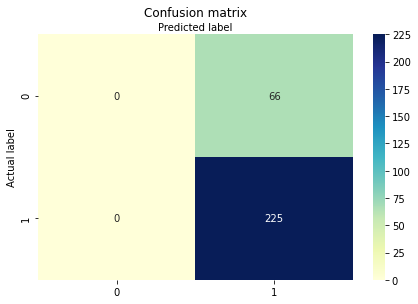

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7731958762886598
Precision: 0.7731958762886598
Recall: 1.0
